Preliminary Data Analysis on selected city networks from https://github.com/bstabler/TransportationNetworks.

Degree distribution, diameter, and clustering coefficient will be calculated

#Imports

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Importing Data

In [2]:
Sydney = pd.read_csv("Sydney.csv")
SiouxFalls = pd.read_csv("SiouxFalls.csv")
Anaheim = pd.read_csv("Anaheim.csv")

In [3]:
# Meet's stuff
Sydney = pd.read_csv("Sydney.csv")
SiouxFalls = pd.read_csv("SiouxFalls.csv")
Anaheim = pd.read_csv("Anaheim.csv")

In [4]:
Sydney.head()

,Unnamed: 0,init_node,term_node,capacity,length,free_flow_time,b,power,speed,critical_speed,lanes
0,0,1,6706,2880,0.904,2.26,0.25,4,24,19.2,2
1,1,2,33087,2880,0.027,0.07,0.25,4,24,19.2,2
2,2,3,30799,2880,0.257,0.64,0.25,4,24,19.2,2
3,3,4,30800,2880,0.123,0.31,0.25,4,24,19.2,2
4,4,5,6692,2880,0.068,0.17,0.25,4,24,19.2,2


In [7]:
# Turns sydney into a graph object
ana_net = nx.Graph()

# Add edges with attributes
for idx, row in Anaheim.iterrows():
    ana_net.add_edge(row['init_node'], row['term_node'], **row.drop(['init_node', 'term_node']).to_dict())

# Functions

In [8]:
def analyze_graph(G):
    # Check if the graph is connected; this is required to compute the diameter
    if nx.is_connected(G):
        diameter = nx.diameter(G)
        print(f"Diameter of the graph: {diameter}")
    else:
        print("Graph is not connected; diameter of the giant component will be calculated.")
        # Find the largest connected component (giant component)
        giant_component = max(nx.connected_components(G), key=len)
        G_giant = G.subgraph(giant_component).copy()

        # Diameter of the giant component
        diameter = nx.diameter(G_giant)
        print(f"Diameter of the giant component: {diameter}")


    # Average Clustering Coefficient
    avg_clustering = nx.average_clustering(G)
    print(f"Average Clustering Coefficient: {avg_clustering}")

    # Degree Distribution
    degrees = [G.degree(n) for n in G.nodes()]
    degree_counts = np.bincount(degrees)
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(degree_counts)), degree_counts, width=0.80, color='b')
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

# Sydney

Diameter of the graph: 26
Average Clustering Coefficient: 0.10764652014652022


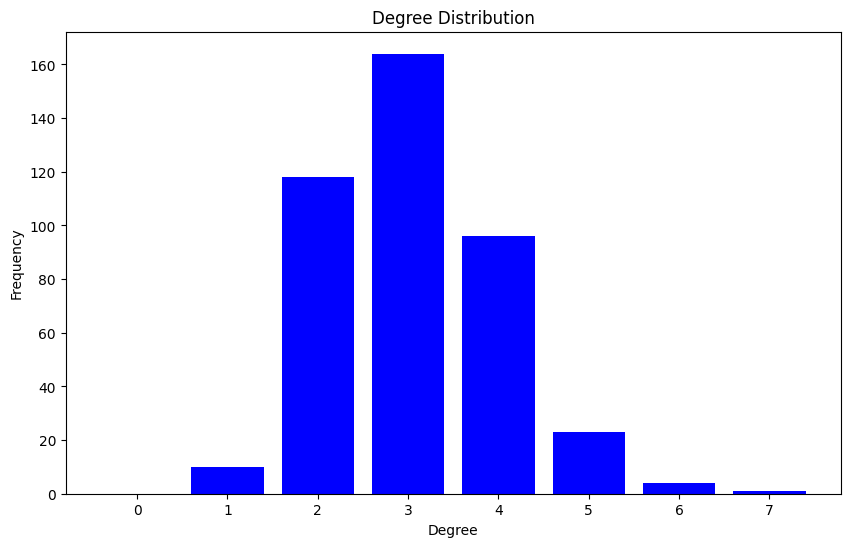

In [9]:
analyze_graph(ana_net)